**Stroke Prediction:**

---



---



In [2]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\r\n0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0\r\n1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0\r\n2,Female,42.0,0,0,Yes,Private,Rural,103.0,40.3,Unknown,0\r\n3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0\r\n4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0\r\n5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0\r\n6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0\r\n7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0\r\n8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0\r\n9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0\r\n10,Male,51.0,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0\r\n11,Female,45.0,0,0,Yes,Private,Urban,69.94,23.5,never smoked,0\r\n12,Female,4.0,0,0,No,children,Urban,84.1,14.1,Unknown,0\r\n13,Male,23.0,0,0,No,Pr

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
dt_treino=pd.read_csv("train.csv")

In [7]:
dt_treino.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
dt_treino.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [10]:
dt_treino.shape

(15304, 12)

** **

---



In [11]:
dt_treino.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Visualização**

---



In [13]:
dt_treino.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         9078
        1          368
Male    0         5593
        1          264
Other   0            1
Name: stroke, dtype: int64

In [14]:
dt_treino['smoking_status'].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [16]:
dt_treino['gender'].value_counts()

qtde_mulheres = len(dt_treino[dt_treino['gender'] == 'Female'])
qtde_homens   = len(dt_treino[dt_treino['gender'] == 'Male'])

porcentagem_mais_mulheres = round(((qtde_mulheres - qtde_homens) / qtde_homens) * 100, 2)
print(f"{porcentagem_mais_mulheres}%")

61.28%


In [17]:
dt_treino.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       4274
        Unknown            2549
        formerly smoked    1337
        smokes             1286
Male    never smoked       2007
        Unknown            1993
        formerly smoked    1000
        smokes              857
Other   Unknown               1
Name: smoking_status, dtype: int64

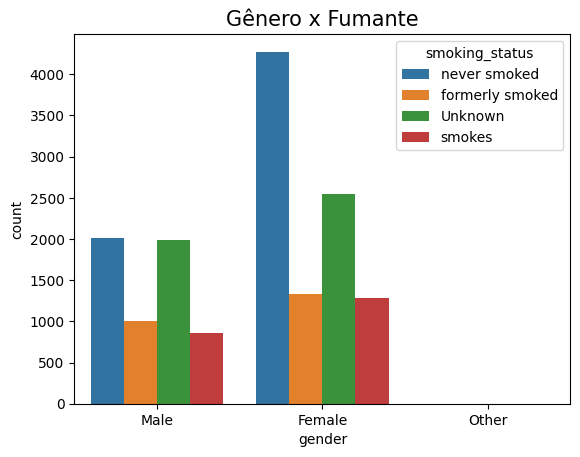

In [19]:
sns.countplot(x=dt_treino['gender'],hue=dt_treino["smoking_status"])
plt.title("Gênero x Fumante",fontsize=15)
plt.show()

In [20]:
dt_treino.groupby(['stroke']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672
1,632,632,632,632,632,632,632,632,632,632,632


**Conversão de variáveis categóricas: Label Encoding**

---



In [22]:
string_treino=dt_treino.select_dtypes(include=['object'])
string_treino

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,never smoked
1,Male,Yes,Private,Rural,formerly smoked
2,Female,Yes,Private,Rural,Unknown
3,Male,Yes,Private,Urban,never smoked
4,Female,No,Private,Rural,never smoked
...,...,...,...,...,...
15299,Female,No,Govt_job,Urban,never smoked
15300,Female,Yes,Private,Urban,never smoked
15301,Female,Yes,Self-employed,Urban,never smoked
15302,Male,Yes,Private,Rural,Unknown


In [23]:
numerico_treino=dt_treino.select_dtypes(include=['int','float'])
numerico_treino

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,28.0,0,0,79.53,31.1,0
1,1,33.0,0,0,78.44,23.9,0
2,2,42.0,0,0,103.00,40.3,0
3,3,56.0,0,0,64.87,28.8,0
4,4,24.0,0,0,73.36,28.8,0
...,...,...,...,...,...,...,...
15299,15299,22.0,0,0,72.63,19.5,0
15300,15300,46.0,1,0,101.19,32.1,0
15301,15301,75.0,0,0,87.69,26.2,0
15302,15302,46.0,0,0,101.13,22.5,0


In [25]:
from sklearn.preprocessing import LabelEncoder
rotulo = LabelEncoder()
dados_de_treino = string_treino.apply(rotulo.fit_transform)
dados_de_treino = dados_de_treino.join(numerico_treino)
dados_de_treino.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,2,0,28.0,0,0,79.53,31.1,0
1,1,1,2,0,1,1,33.0,0,0,78.44,23.9,0
2,0,1,2,0,0,2,42.0,0,0,103.00,40.3,0
3,1,1,2,1,2,3,56.0,0,0,64.87,28.8,0
4,0,0,2,0,2,4,24.0,0,0,73.36,28.8,0


Modelagem

---



In [26]:
xtreino = dados_de_treino.drop(["stroke"],axis=1)
xtreino.shape

(15304, 11)

In [27]:
ytreino=dados_de_treino['stroke']
ytreino.shape


(15304,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtreino,ytreino,test_size=0.5)

In [29]:
print(x_test.shape)
print(y_test.shape)

(7652, 11)
(7652,)


In [30]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
9720,0,1,2,1,3,9720,27.0,0,0,92.22,25.3
14756,0,0,4,0,0,14756,8.0,0,0,79.33,16.1
2643,1,1,2,0,2,2643,56.0,0,0,101.06,31.7
8514,1,1,2,1,1,8514,64.0,0,0,78.90,36.0
4795,1,1,2,0,2,4795,48.0,0,0,86.96,32.3


In [31]:
y_train.head()

9720     0
14756    0
2643     0
8514     0
4795     0
Name: stroke, dtype: int64

In [33]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
8030,0,1,2,0,1,8030,68.00,0,0,73.29,26.1
6921,1,0,4,1,0,6921,1.08,0,0,90.73,19.4
5248,0,0,2,1,2,5248,29.00,0,0,82.91,24.3
9899,0,1,2,1,2,9899,32.00,0,0,83.83,23.4
13296,0,0,2,0,1,13296,23.00,0,0,72.99,30.0


In [34]:
y_test.head()

8030     0
6921     0
5248     0
9899     0
13296    0
Name: stroke, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier
df_model = DecisionTreeClassifier()
df_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_predict=df_model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
dtscore=df_model.score(x_test,y_test)
print("Árvore de Decisão: ",dtscore * 100)

Árvore de Decisão:  93.07370622059592


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train,y_train)
y_pred_rfc=rf.predict(x_test)
rfscore=rf.score(x_test,y_test)
print("Floresta Aleatório: ",rfscore * 100)

Floresta Aleatório:  95.71353894406691


In [45]:
print('Score:', rf.score(x_test, y_test) * 100)

Score: 95.71353894406691


In [50]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0, max_iter=1000)
lr.fit(x_train,y_train)

Y_pred=lr.predict(x_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
lrmodel=lr.score(x_test,y_test)
print(lrmodel * 100)

95.55671719811814


0.9546523784631469


KNN

In [54]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)


KNeighborsClassifier()

In [57]:
Y_pred=knn.predict(x_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
knnmodel=knn.score(x_test,y_test)
print(knnmodel * 100)

95.71353894406691


In [62]:
from sklearn.metrics import f1_score

f1 = pd.DataFrame(columns=['train', 'test'], index=['Random Forest'])

model_dict = {'Random Forest': rf}

for name, model in model_dict.items():
  f1.loc[name, 'train'] = f1_score(y_true=y_train, y_pred=model.predict(x_train),average='micro')
  f1.loc[name, 'test']  = f1_score(y_true=y_test, y_pred=model.predict(x_test),average='micro')

f1

,train,test
Random Forest,1.0,0.957135


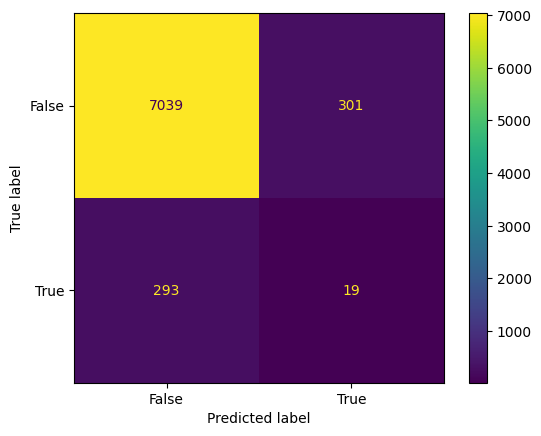

In [63]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(y_train, y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [64]:
Accuracy = metrics.accuracy_score(y_train, y_test)

In [66]:
print(Accuracy)

0.9223732357553581


In [65]:
Precision = metrics.precision_score(y_train, y_test)

print(Precision)


0.059375


In [67]:
Sensitivity_recall = metrics.recall_score(y_train, y_test)

print(Sensitivity_recall)


0.060897435897435896


In [68]:
Specificity = metrics.recall_score(y_train, y_test, pos_label=0)

print(Specificity)


0.958991825613079
